IMPORTING REQUIRED LIBRARIES

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings(action='ignore')

READING THE FIRST DATASET - Observations made by the NASA Kepler space telescope

In [20]:
exoTrain = pd.read_csv('datasets/exoTrain.csv', sep=',') #This is the training set

In [21]:
exoTrain

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [22]:
#The target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet).
#So converting them to binary values for easier processing of data.

categ = {2: 1,1: 0}
exoTrain.LABEL = [categ[item] for item in exoTrain.LABEL]

VISUALIZATION

Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

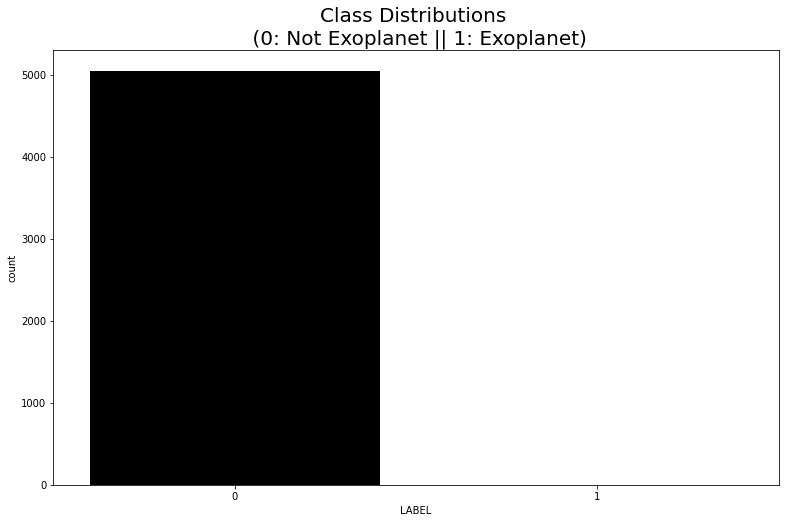

In [23]:
#Class distribution

plt.figure(figsize=(13,8))
colors = ["0", "1"]
sns.countplot('LABEL', data=exoTrain, palette=colors)
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=20)

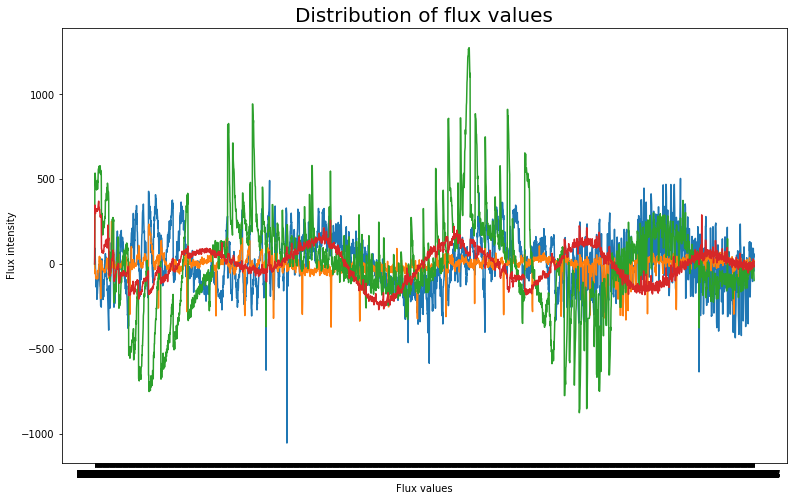

In [24]:
#Observing the intesity of flux values of first 4 rows of exoTrain

from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
plt.title('Distribution of flux values', fontsize=20)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(exoTrain.iloc[0,])
plt.plot(exoTrain.iloc[1,])
plt.plot(exoTrain.iloc[2,])
plt.plot(exoTrain.iloc[3,])
plt.show()

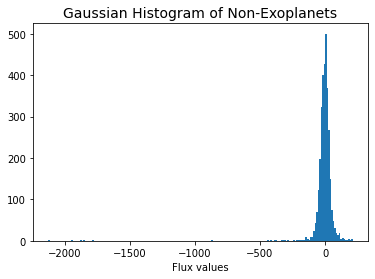

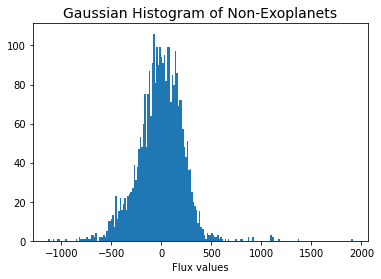

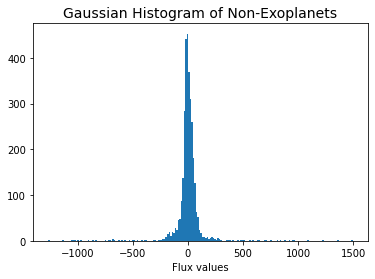

In [25]:
#Gaussian histogram of non-exoplanets data

labels_1=[100,200,300]
for i in labels_1:
    plt.figure(figsize=(6,4))
    plt.hist(exoTrain.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram of Non-Exoplanets", fontsize=14)
    plt.xlabel("Flux values")
    plt.show()

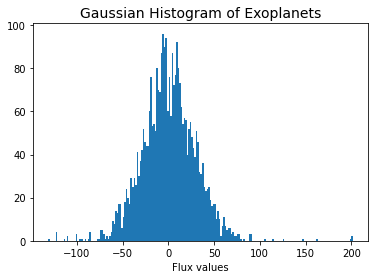

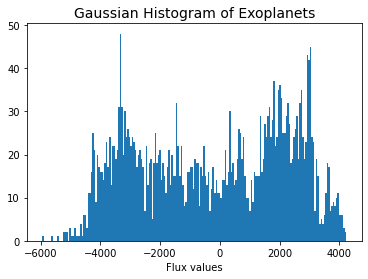

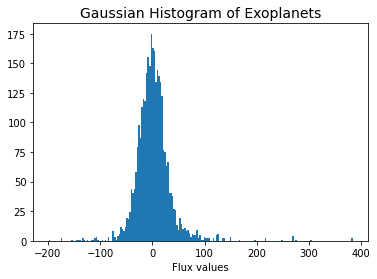

In [26]:
#Gaussian histogram of the data when exoplanets are present

labels_1=[16,21,25]
for i in labels_1:
    plt.figure(figsize=(6,4))
    plt.hist(exoTrain.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram of Exoplanets", fontsize=14)
    plt.xlabel("Flux values")
    plt.show()

READING THE SECOND DATASET - NASA Kepler Exoplanet Search Results

In [27]:
data = pd.read_csv('datasets/keplerResults.csv', sep=',') #This is the dataset of Kepler Exoplanet Search Results

In [28]:
data

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

PREPROCESSING

In [30]:
def preprocess_inputs(df):
    df=df.copy()
    
    #drop unnecessary columns
    df = df.drop(['rowid','kepler_name','kepid','kepoi_name','koi_pdisposition','koi_score'], axis=1)

    #Limit the target values to CANDIDATE and CONFIRMED
    false_positive_rows = df.query('koi_disposition == "FALSE POSITIVE"').index
    df = df.drop(false_positive_rows, axis=0).reset_index(drop=True)

    #Drop columns with all missing values
    df = df.drop(['koi_teq_err1','koi_teq_err2'],axis=1)

    #Fill remaining missing values
    df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])

    for column in df.columns[df.isna().sum()>0]:
        df[column] = df[column].fillna(df[column].mean())

    #One hot encoding on koi_tce_delivname column
    delivname_dummies = pd.get_dummies(df['koi_tce_delivname'], prefix='delivname')
    df = pd.concat([df, delivname_dummies], axis=1)
    df = df.drop(['koi_tce_delivname'], axis=1)

    #Split df into x and y
    y = df['koi_disposition']
    x=df.drop(['koi_disposition'], axis=1)

    #Train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1)

    #Scale X
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

    return x_train, x_test, y_train, y_test

In [31]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

In [32]:
x_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,delivname_q1_q16_tce,delivname_q1_q17_dr24_tce,delivname_q1_q17_dr25_tce
833,-0.081559,-0.115728,-0.027106,-0.027106,-0.357440,-0.232935,0.232935,-0.455570,-0.230835,0.230835,...,0.066768,-0.047202,-0.147522,0.079605,1.441666,-1.055854,0.295677,-0.232765,-0.173946,0.296411
2989,-0.081559,-0.115728,-0.027106,-0.027106,-0.250962,-0.026297,0.026297,-0.401328,2.641141,-2.641141,...,-0.597633,-0.122189,-0.093221,0.203707,-0.893312,-1.781447,0.792517,-0.232765,-0.173946,0.296411
2110,-0.081559,-0.115728,-0.027106,-0.027106,-0.326667,-0.227503,0.227503,5.840151,-0.181059,0.181059,...,0.837949,-0.208865,-0.377397,0.210937,-1.169987,-0.920614,1.366589,-0.232765,-0.173946,0.296411
1682,-0.081559,-0.115728,-0.027106,-0.027106,-0.333186,-0.236718,0.236718,-0.410203,-0.403798,0.403798,...,-0.929834,-0.093738,0.011761,0.163947,-0.147908,-1.555607,0.282141,-0.232765,-0.173946,0.296411
3034,-0.081559,-0.115728,-0.027106,-0.027106,0.845293,0.713408,-0.713408,0.196903,0.916547,-0.916547,...,-1.001020,-0.075653,0.096833,0.136234,-0.564926,-0.396039,0.495528,-0.232765,-0.173946,0.296411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.081559,-0.115728,-0.027106,-0.027106,-0.319925,-0.191475,0.191475,-0.390591,0.750624,-0.750624,...,-1.072206,-0.079181,0.113123,0.141054,1.158623,1.054245,0.221629,-0.232765,-0.173946,0.296411
2763,-0.081559,-0.115728,-0.027106,-0.027106,-0.248854,-0.065483,0.065483,-0.277345,-0.112678,0.112678,...,-1.001020,-0.080284,0.075112,0.115751,0.642075,-1.298298,0.940613,-0.232765,-0.173946,0.296411
905,-0.081559,-0.115728,-0.027106,-0.027106,-0.149916,-0.213673,0.213673,-0.281024,-0.269551,0.269551,...,0.256597,-0.035733,-0.133042,0.026591,0.620311,-0.180297,0.885674,-0.232765,-0.173946,0.296411
3980,-0.081559,-0.115728,-0.027106,-0.027106,-0.293252,-0.219259,0.219259,-0.326790,-0.168991,0.168991,...,0.244733,-0.115793,-0.285085,0.237444,-1.258905,1.243702,-0.514076,-0.232765,-0.173946,0.296411


In [33]:
y_train.value_counts()

CONFIRMED    698
CANDIDATE    664
Name: koi_disposition, dtype: int64

In [34]:
#Encoding y_train, y_test

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#Candidate = 0, Confirmed = 1

In [45]:
y_train, y_test

(array([1, 0, 1, ..., 1, 1, 1]), array([0, 1, 1, ..., 0, 1, 1]))

TRAINING

In [35]:
models = {
    "Logistic Regression": LogisticRegression(),
    "      Decision Tree": DecisionTreeClassifier(),
    "     Neural Network": MLPClassifier(),
    "      Random Forest": RandomForestClassifier(),
    "  Gradient Boosting": GradientBoostingClassifier(),
    "            XGBoost": XGBClassifier(eval_metric='logloss'),
    "           LightGBM": LGBMClassifier(),
    "           CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
      Decision Tree trained.
     Neural Network trained.
      Random Forest trained.
  Gradient Boosting trained.
            XGBoost trained.
           LightGBM trained.
           CatBoost trained.


RESULTS

In [38]:
y_pred = model.predict(x_test)

In [39]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
#Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. 

def get_classification(y_test, y_pred, positive_label=1):
    tp = 0 #True positives
    fn = 0 #False negatives
    fp = 0 #False positives
    tn = 0 #True negatives
    
    for y_t, y_p in zip(y_test, y_pred):
        if y_t == positive_label:
            if y_p == positive_label:
                tp += 1
            else:
                fn += 1
        else:
            if y_p == positive_label:
                fp += 1
            else:
                tn += 1
    
    return tp, fn, fp, tn

#Accuracy is one metric for evaluating classification models. 
#It is the fraction of predictions our model got right.

def get_accuracy(tp, fn, fp, tn): #
    acc = (tp + tn) / (tp + fn + fp + tn)
    return acc 

#Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model.

def get_precision(tp, fn, fp, tn):
    prec = tp / (tp + fp)
    return prec

#The recall measures the model's ability to detect positive samples.

def get_recall(tp, fn, fp, tn):
    rec = tp / (tp + fn)
    return rec

#F1-score sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.
    
def get_f1_score(tp, fn, fp, tn):
    prec = get_precision(tp, fn, fp, tn)
    rec = get_recall(tp, fn, fp, tn)
    f1_score = (2 * prec * rec) / (prec + rec)
    return f1_score

In [46]:
#Accuracy

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(name + " Accuracy: {:.3f}%".format(get_accuracy(*get_classification(y_test, y_pred)) * 100))

Logistic Regression Accuracy: 79.302%
      Decision Tree Accuracy: 75.370%
     Neural Network Accuracy: 80.560%
      Random Forest Accuracy: 80.591%
  Gradient Boosting Accuracy: 82.038%
            XGBoost Accuracy: 81.598%
           LightGBM Accuracy: 81.881%
           CatBoost Accuracy: 82.101%


In [42]:
#F1-score

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(name + " F1 Score: {:.5f}".format(get_f1_score(*get_classification(y_test, y_pred))))

Logistic Regression F1 Score: 0.80961
      Decision Tree F1 Score: 0.75676
     Neural Network F1 Score: 0.81031
      Random Forest F1 Score: 0.80951
  Gradient Boosting F1 Score: 0.82765
            XGBoost F1 Score: 0.82213
           LightGBM F1 Score: 0.82492
           CatBoost F1 Score: 0.82836
